# Introdução.

* A Rossmann opera mais de 3.000 drogarias em 7 países europeus. Atualmente, os gerentes de loja da Rossmann têm a tarefa de prever suas vendas diárias com até seis semanas de antecedência. As vendas da loja são influenciadas por muitos fatores, incluindo promoções, competição, feriados escolares e estaduais, sazonalidade e localidade. Com milhares de gerentes individuais prevendo vendas com base em suas circunstâncias únicas, a precisão dos resultados pode ser bastante variada.

# Descrição do projeto



# Descrição do projeto
 
 
 
* Nesta parte será encontrado a melhor maneira de representar as variáveis discretas.
* A estratégia que será utilizada vai adotar os seguintes passos:
* Definindo um modelo padrão de machine learning.
* Separa os dados em Teste e Validação.
 * Validação: 2013/01/01 - 2015/06/18.
 * Teste: 2015/06/19 - 2015/07/31.
 * Os dados de validação serão utilizados para encontrar a maneira de representar as variáveis discretas. O método utilizado para avaliar esses dados foi através da validação prequential Expanding.
 * Os dados de teste serão empregados para simular o ambiente real no qual o modelo de machine learning será aplicado. Logo, o seu uso só será utilizado no final do projeto para avaliar os pontos fortes e fracos do modelo.
 * A validação será avaliada pelas seguintes métricas:
   * MAPE - Erro médio Absoluto Percentual.
   * RMSLE - Raiz do erro médio quadrático considerando o log.
   * RMSE - Raiz do erro médio quadrático.
 
 
 
 
 


# Descrição dos dados.

* Os dados foram obtidos do kaggle: 
  * https://www.kaggle.com/c/rossmann-store-sales


* Descrição dos arquivos utilizados :
 
 * **train.csv** - historical data including Sales
 * **test.csv** - historical data excluding Sales
 * **store.csv** - supplemental information about the stores
 
* **Os dados utilizados veio do tratamento feito nos arquivos train,test,store**. 

* Legenda:
  * **[T]** - Dados veio do arquivo Train.
  * **[S]** - Dados veio do arquivo do Store.
  * **[C]** - Criado pelo notebook Tratamento dos dados.
  * **[D]** - Criado pelo notebook pela Descrição dos dados.

* Descrição dos dados.
 
 * **day_of_week [T]** - Day of week.
 * **date [T]** - days the data was acquired. 
 * **store [T]** - a unique Id for each store
 * **sales [T]** - the turnover for any given day (this is what you are predicting)
 * **customers [T]** - the number of customers on a given day
 * **state_holiday [T]** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
 * **school_holiday [T]** - indicates if the (Store, Date) was affected by the closure of public schools
 * **store_type [S]** - differentiates between 4 different store models: a, b, c, d
 * **Assortment [S]** - describes an assortment level: a = basic, b = extra, c = extended
 * **competition_distance [S]** - distance in meters to the nearest competitor store
 * **competition_open_since_month [S]** - gives the approximate month of the time the nearest competitor was opened.
 * **competition_open_since_year [S]** - gives the approximate year of the time the nearest competitor was opened
 * **Promo [T]** - indicates whether a store is running a promo on that day
 * **Promo2 [S]** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
 * **promo2_since_week [S]** - describes the calendar week when the store started participating in Promo2.

 * **promo2_since_year [S]** - describes the year  when the store started participating in Promo2.

 * **is_promo [S]** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.
 * **year [C]** - year the data died.
 * **month [C]**  - month the data died.
 * **day [C]**  - day the data died.
 * **week_year [C]**  - calendar week  the data died.
 * **competition_time_month [C]** - time difference in months between sample and competitor opening.
 * **without_competition [C]** - Store has competition.
 * **promo_time_week [C]** - Time the store works without the promotion.
 * **Sales_raiz[D]** square root applied to Target data.
 * **Sales_raiz[D]** log10 applied to Target data.

# Funções

In [ ]:


def MAPE(y_pred,Y_teste):
  return np.mean(100*np.abs(y_pred - Y_teste)/np.abs(Y_teste))

def label_encoder(d,col):
  enc      = LabelEncoder()
  enc      = enc.fit(d[col])
  inteiros = enc.fit_transform(d[col])
  d[col]   = inteiros
  return d

def dummies_var(dados,coluna):
  df_aux = dados
  df_aux = df_aux.join(pd.get_dummies(df_aux[coluna], prefix=coluna))
  df_aux = df_aux.drop(columns=coluna)
  return df_aux


def validation(X,Y,coluna,flag,Date):
  vetor_MAPE = np.zeros(5) 
  vetor_MSLR = np.zeros(5)
  vetor_RMSE = np.zeros(5)
  Y_pred = []
  Y_val  = []
  for i in range(5):
    # Dados de treinamento
    print('Data do inicio do treinamento:', Date[X['Total_dias'] < 689 + 6*7*i].dt.date.values[0],
          'Data do final do treinamento :',Date[X['Total_dias'] < 689 + 6*7*i].dt.date.values[-1])
  
    
    X_t = X[X['Total_dias']  < 689 + 6*7*i]
    y_t = Y[coluna][Y['Total_dias']  < 689 + 6*7*i]
    X_t = X_t.drop(columns = ['Total_dias'])
    
    # Dados de validação
    print('Data do inicio do Validação  :', Date[(X['Total_dias'] >= 689 + 6*7*i) & (X['Total_dias'] <= 689 + 6*7*(i+1))].dt.date.values[0],
          'Data do final do Validação   :',Date[(X['Total_dias'] >= 689 + 6*7*i) & (X['Total_dias'] <= 689 + 6*7*(i+1))].dt.date.values[-1])

    X_v = X[(X['Total_dias'] >= 689 + 6*7*i) & (X['Total_dias'] <= 689 + 6*7*(i+1))]
    y_v = Y[coluna][(Y['Total_dias'] >= 689 + 6*7*i) & (Y['Total_dias'] <= 689 + 6*7*(i+1))]
    X_v = X_v.drop(columns = ['Total_dias'])
    
    md        = model.fit(X_t, y_t)
    y_pred    = md.predict(X_v)
    
    if flag == 'log':
      y_pred = np.round(10**y_pred - 1)  # eliminar o ruído provocado pelo computados atravez dou round
      y_v    = np.round(10**y_v - 1)
    if flag == 'sqrt':
      y_pred = np.round(y_pred**2)
      y_v    = np.round(y_v**2)
    if flag == 'normal':
      y_pred = y_pred
      y_v    = y_v
    
  
    
    mape = MAPE(y_v,y_pred)
    mslr = mean_squared_log_error(y_v,y_pred)
    rmse = mean_squared_error(y_v,y_pred,squared =False)
    vetor_MAPE[i] = mape
    vetor_MSLR[i] = mslr
    vetor_RMSE[i] = rmse
  
    print('MAPE: ',np.format_float_positional(mape,5))
    print('RMSLE:',np.format_float_positional(mslr,5))
    print('RMSE: ',np.format_float_positional(rmse,5))
     
   
  print('Mape Geral: ',np.format_float_positional(np.mean(vetor_MAPE),5),'Std:',np.format_float_positional(np.std(vetor_MAPE),5),'Erro:',np.format_float_positional(np.std(vetor_MAPE)/np.sqrt(5),5))
  print('Rmsle Geral:',np.format_float_positional(np.mean(vetor_MSLR),5),'Std:',np.format_float_positional(np.std(vetor_MSLR),5),'Erro:',np.format_float_positional(np.std(vetor_MSLR)/np.sqrt(5),5))
  print('Rmse Geral: ',np.format_float_positional(np.mean(vetor_RMSE),5),'Std:',np.format_float_positional(np.std(vetor_RMSE),5),'Erro:',np.format_float_positional(np.std(vetor_RMSE)/np.sqrt(5),5))
  return vetor_MAPE,vetor_MSLR,vetor_RMSE

# Biblioteca

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importando os dados.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/dados/time series/dados_novos1.csv')

In [ ]:
df.head() # vendo os dados

,Unnamed: 0,store,day_of_week,date,sales,customers,promo,state_holiday,school_holiday,store_type,...,without_competition,is_promo,year,month,day,week_year,competition_time_month,promo_time_week,Sales_raiz,Sales_log10
0,0,1,5,2015-07-31,5263,555,1,regular_day,1,c,...,1.0,0,2015,7,31,31,84,0,72.546537,3.721316
1,1,2,5,2015-07-31,6064,625,1,regular_day,1,a,...,1.0,1,2015,7,31,31,94,279,77.871689,3.782831
2,2,3,5,2015-07-31,8314,821,1,regular_day,1,a,...,1.0,1,2015,7,31,31,105,226,91.181138,3.919862
3,3,4,5,2015-07-31,13995,1498,1,regular_day,1,c,...,1.0,0,2015,7,31,31,71,0,118.300465,4.146004
4,4,5,5,2015-07-31,4822,559,1,regular_day,1,a,...,1.0,0,2015,7,31,31,4,0,69.440622,3.683317


In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
np.sum(df.sales == 0)

0

* Olhando os dados de Target antes de prosseguir com o projeto.

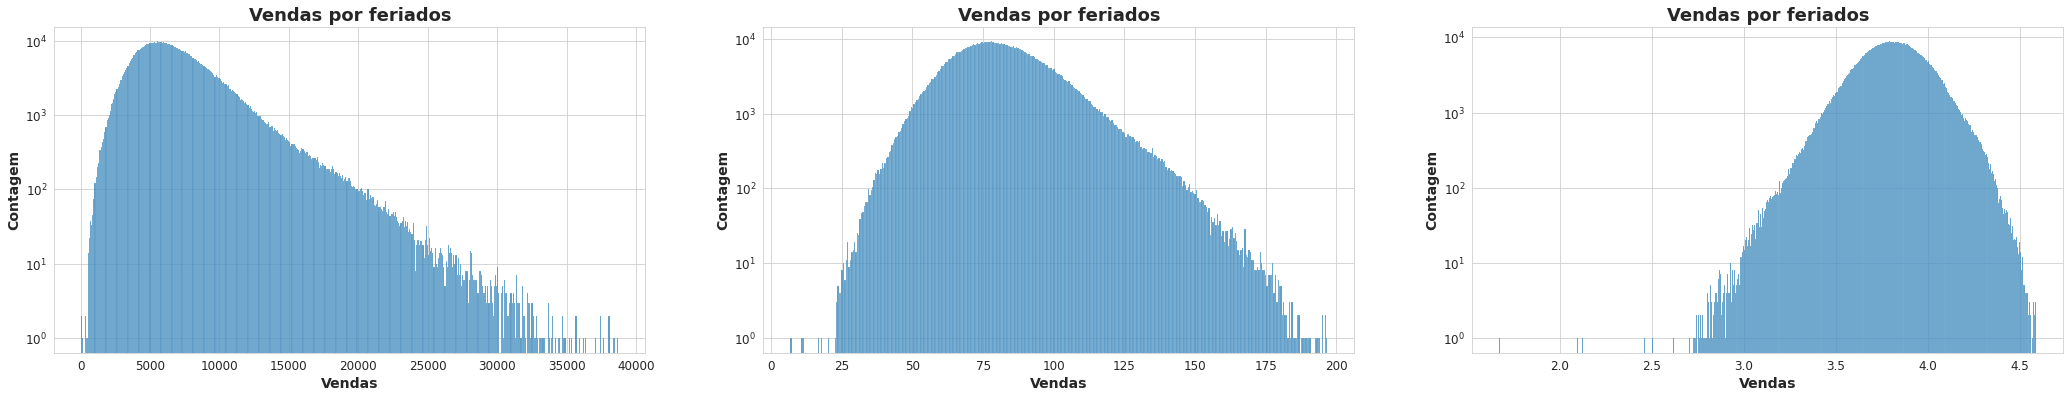

In [ ]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(36,6))
plt.subplot(1,3,1)
plt.title('Vendas por feriados',size=18,fontweight= 'bold')
sns.histplot(x='sales', data=df)
plt.xlabel('Vendas', fontsize = 14,fontweight= 'bold')
plt.ylabel('Contagem', fontsize = 14,fontweight= 'bold')
plt.semilogy()
plt.subplot(1,3,2)
plt.title('Vendas por feriados',size=18,fontweight= 'bold')
sns.histplot(x='Sales_raiz', data=df)
plt.xlabel('Vendas', fontsize = 14,fontweight= 'bold')
plt.ylabel('Contagem', fontsize = 14,fontweight= 'bold')
plt.semilogy()
plt.subplot(1,3,3)
plt.title('Vendas por feriados',size=18,fontweight= 'bold')
sns.histplot(x='Sales_log10', data=df)
plt.xlabel('Vendas', fontsize = 14,fontweight= 'bold')
plt.ylabel('Contagem', fontsize = 14,fontweight= 'bold')
plt.semilogy()
plt.show()

* Verificando a tranformação inversa.

In [ ]:
np.sum(np.round((10**df['Sales_log10'] - 1)) - df['sales'] == 0),df.shape

(731432, (731432, 26))

In [ ]:
np.sum(np.round(df['Sales_raiz']**2) - df['sales'] == 0),df.shape

(731432, (731432, 26))

* Contagem de dias

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
dias_mes = []
for i in range(1,13):
  dias_mes.append(np.max(df['date'].dt.day[df['date'].dt.month == i]))

soma_dias = []

for i in range(1,13):
  soma_dias.append(np.sum(dias_mes[:i]))

vetor = np.zeros(df.shape[0])

for i in range(2,13):
  vetor[df['date'].dt.month == i] = soma_dias[i -2]

df['Total_dias']= vetor + df['date'].dt.day 

In [ ]:
df['Total_dias'][df['year'] == 2014] = df['Total_dias'][df['year'] == 2014] +  df['Total_dias'][df['year'] == 2013].unique()[0]
df['Total_dias'][df['year'] == 2015] = df['Total_dias'][df['year'] == 2015] +   df['Total_dias'][df['year'] == 2014].unique()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Total_dias'].diff().unique()

array([nan,  0., -1.])

In [ ]:
df = df.reindex(index=df.index[::-1])
df.index = np.arange(df.shape[0])

# Separando os dados de Teste e Validação.

In [ ]:
val   = df.copy()
test  = df.copy()

In [ ]:
val  = val[val['date'] < '2015-06-19']     # Dados de validação
test = test[test['date'] >= '2015-06-19']  # Dados de teste

# Dados strings.

* Codificando os dados string.

In [ ]:
print('Dados de Validação')
print('Dados únicos state holiday',val['state_holiday'].unique())
print('Dados únicos store type',val['store_type'].unique())
print('Dados únicos assortment',val['assortment'].unique())

Dados de Validação
Dados únicos state holiday ['regular_day' 'public_holiday' 'easter_holiday' 'christmas']
Dados únicos store type ['d' 'a' 'c' 'b']
Dados únicos assortment ['extended' 'basic' 'extra']


In [ ]:
print('Dados de teste')
print('Dados únicos state holiday',test['state_holiday'].unique())
print('Dados únicos store type',test['store_type'].unique())
print('Dados únicos assortment',test['assortment'].unique())

Dados de teste
Dados únicos state holiday ['regular_day']
Dados únicos store type ['d' 'a' 'c' 'b']
Dados únicos assortment ['extended' 'basic' 'extra']


* Será criado cópias do dataset para poder ficar mais fácil de trabalhar.
* Logo, temos os seguintes datasets:
* Dataset df1.
  - state_holiday -> get_dummies.
  - store_type    -> get_dummies.
  - assortment    -> get_dummies.
* Dataset df2.
  - state_holiday -> get_dummies.
  - store_type    -> Labelencoder.
  - assortment    -> get_dummies.
* Dataset df3.
  - state_holiday -> get_dummies.
  - store_type    -> get_dummies.
  - assortment    -> Labelencoder.
* Dataset df4.
  - state_holiday -> get_dummies.
  - store_type    -> Labelencoder.
  - assortment    -> Labelencoder.
* Dataset df5.
  - state_holiday -> Labelencoder.
  - store_type    -> Labelencoder.
  - assortment    -> Labelencoder.
 
 
 
 


In [ ]:
df1 = val.copy() 
df2 = val.copy() 
df3 = val.copy() 
df4 = val.copy() 
df5 = val.copy() 

In [ ]:
col = ['state_holiday','store_type','assortment']

In [ ]:
# Codficando df1
df1 = dummies_var(df1,col)

# codificando df2
df2 = dummies_var(df2,[col[0],col[2]])
df2 = label_encoder(df2,col[1])

# codificando df3
df3 = dummies_var(df3,[col[0],col[1]])
df3 = label_encoder(df3,col[2])

# codificando df4
df4 = dummies_var(df4,col[0])
df4 = label_encoder(df4,col[1])
df4 = label_encoder(df4,col[2])

# codificando df5
df5 = label_encoder(df5,col[0])
df5 = label_encoder(df5,col[1])
df5 = label_encoder(df5,col[2])


In [ ]:
# Modelo padrão
model    = RandomForestRegressor(n_estimators = 10,random_state = 10) 

In [ ]:
#np.log2(30)

In [ ]:
Date = val['date']

In [ ]:
df1.index = np.arange(df1.shape[0])
X1   = df1.drop(columns = ['date','sales','Sales_raiz','Sales_log10'])
Y1_n = df1[['sales','Total_dias']]
Y1_r = df1[['Sales_raiz','Total_dias']]
Y1_l = df1[['Sales_log10','Total_dias']]

df2.index = np.arange(df2.shape[0])
X2   = df2.drop(columns = ['date','sales','Sales_raiz','Sales_log10'])
Y2_n = df2[['sales','Total_dias']]
Y2_r = df2[['Sales_raiz','Total_dias']]
Y2_l = df2[['Sales_log10','Total_dias']]

df3.index = np.arange(df3.shape[0])
X3   = df3.drop(columns = ['date','sales','Sales_raiz','Sales_log10'])
Y3_n = df3[['sales','Total_dias']]
Y3_r = df3[['Sales_raiz','Total_dias']]
Y3_l = df3[['Sales_log10','Total_dias']]

df4.index = np.arange(df4.shape[0])
X4   = df4.drop(columns = ['date','sales','Sales_raiz','Sales_log10'])
Y4_n = df4[['sales','Total_dias']]
Y4_r = df4[['Sales_raiz','Total_dias']]
Y4_l = df4[['Sales_log10','Total_dias']]

df5.index = np.arange(df5.shape[0])
X5        = df5.drop(columns = ['date','sales','Sales_raiz','Sales_log10'])
Y5_n      = df5[['sales','Total_dias']]
Y5_r      = df5[['Sales_raiz','Total_dias']]
Y5_l      = df5[['Sales_log10','Total_dias']]

In [ ]:
#flag = 'normal'

In [ ]:
X3.head()

,store,day_of_week,customers,promo,school_holiday,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,...,promo_time_week,Total_dias,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,store_type_a,store_type_b,store_type_c,store_type_d
0,1115,4,300,0,1,1,5350.0,1,2013,1,...,32,3.0,0,0,0,1,0,0,0,1
1,1114,4,3211,0,1,1,870.0,1,2013,0,...,0,3.0,0,0,0,1,1,0,0,0
2,1113,4,718,0,1,1,9260.0,1,2013,0,...,0,3.0,0,0,0,1,1,0,0,0
3,1112,4,809,0,1,1,1880.0,4,2006,0,...,0,3.0,0,0,0,1,0,0,1,0
4,1111,4,444,0,1,0,1900.0,6,2014,1,...,-30,3.0,0,0,0,1,1,0,0,0


In [ ]:
print('target Normal')
vetor_MAPE1_n,vetor_MSLR1_n,vetor_RMSE1_n = validation(X1,Y1_n,'sales','normal',Date)
print('\n')
print('Sqrt no target')
vetor_MAPE1_r,vetor_MSLR1_r,vetor_RMSE1_r = validation(X1,Y1_r,'Sales_raiz','sqrt',Date)
print('\n')
print('log no target')
vetor_MAPE1_l,vetor_MSLR1_l,vetor_RMSE1_l = validation(X1,Y1_l,'Sales_log10','log',Date)

target Normal
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.72047
RMSLE: 0.00942
RMSE:  876.23745
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.53011
RMSLE: 0.00548
RMSE:  529.54456
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.89414
RMSLE: 0.00398
RMSE:  417.11663
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.89704
RMSLE: 0.00590
RMSE:  677.54737
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 2015-05-07 

In [ ]:
#normal
#Mape Geral:  5.85560 Std: 0.98928 Erro: 0.44242
#Rmsle Geral: 0.00586 Std: 0.00190 Erro: 0.00085
#Rmse Geral:  601.57006 Std: 160.80589 Erro: 71.91458

#sqrt
#Mape Geral:  5.89364 Std: 1.03520 Erro: 0.46296
#Rmsle Geral: 0.00584 Std: 0.00196 Erro: 0.00088
#Rmse Geral:  599.42166 Std: 165.16013 Erro: 73.86185

#log
#Mape Geral:  5.94829 Std: 1.08257 Erro: 0.48414
#Rmsle Geral: 0.00595 Std: 0.00207 Erro: 0.00093
#Rmse Geral:  607.64436 Std: 170.51503 Erro: 76.25664

In [ ]:
print('target Normal')
vetor_MAPE2_n,vetor_MSLR2_n,vetor_RMSE2_n  = validation(X2,Y2_n,'sales','normal',Date)
print('\n')
print('Sqrt no target')
vetor_MAPE2_r,vetor_MSLR2_r,vetor_RMSE2_r = validation(X2,Y2_r,'Sales_raiz','sqrt',Date)
print('\n')
print('log no target')
vetor_MAPE2_l,vetor_MSLR2_l,vetor_RMSE2_l = validation(X2,Y2_l,'Sales_log10','log',Date)

target Normal
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.70367
RMSLE: 0.00937
RMSE:  874.87413
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.52009
RMSLE: 0.00543
RMSE:  528.56466
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.90230
RMSLE: 0.00401
RMSE:  417.97532
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.89672
RMSLE: 0.00591
RMSE:  679.73003
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 2015-05-07 

In [ ]:
#Mape Geral:  5.85166 Std: 0.98212 Erro: 0.43922
#Rmsle Geral: 0.00585 Std: 0.00188 Erro: 0.00084
#Rmse Geral:  602.03302 Std: 160.25303 Erro: 71.66734


#Mape Geral:  5.89001 Std: 1.03872 Erro: 0.46453
#Rmsle Geral: 0.00584 Std: 0.00199 Erro: 0.00089
#Rmse Geral:  599.05865 Std: 166.09932 Erro: 74.28187


#Mape Geral:  5.94798 Std: 1.08764 Erro: 0.48641
#Rmsle Geral: 0.00595 Std: 0.00208 Erro: 0.00093
#Rmse Geral:  609.28492 Std: 170.97224 Erro: 76.46111

In [ ]:
print('target Normal')
vetor_MAPE3_n,vetor_MSLR3_n,vetor_RMSE3_n  = validation(X3,Y3_n,'sales','normal',Date)
print('\n')
print('Sqrt no target')
vetor_MAPE3_r,vetor_MSLR3_r,vetor_RMSE3_r = validation(X3,Y3_r,'Sales_raiz','sqrt',Date)
print('\n')
print('log no target')
vetor_MAPE3_l,vetor_MSLR3_l,vetor_RMSE3_l = validation(X3,Y3_l,'Sales_log10','log',Date)

target Normal
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.72585
RMSLE: 0.00940
RMSE:  877.14688
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.53585
RMSLE: 0.00548
RMSE:  529.76708
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.89461
RMSLE: 0.00398
RMSE:  416.84675
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.89474
RMSLE: 0.00591
RMSE:  679.9734
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 2015-05-07 D

In [ ]:
#Mape Geral:  5.85654 Std: 0.99141 Erro: 0.44337
#Rmsle Geral: 0.00586 Std: 0.00189 Erro: 0.00085
#Rmse Geral:  602.29463 Std: 161.35034 Erro: 72.15807

#Mape Geral:  5.89490 Std: 1.04576 Erro: 0.46768
#Rmsle Geral: 0.00584 Std: 0.00198 Erro: 0.00089
#Rmse Geral:  599.68822 Std: 166.49207 Erro: 74.45752


#Mape Geral:  5.95073 Std: 1.08075 Erro: 0.48333
#Rmsle Geral: 0.00595 Std: 0.00207 Erro: 0.00093
#Rmse Geral:  607.77493 Std: 169.66924 Erro: 75.87839

In [ ]:
print('target Normal')
vetor_MAPE4_n,vetor_MSLR4_n,vetor_RMSE4_n  = validation(X4,Y4_n,'sales','normal',Date)
print('\n')
print('Sqrt no target')
vetor_MAPE4_r,vetor_MSLR4_r,vetor_RMSE4_r = validation(X4,Y4_r,'Sales_raiz','sqrt',Date)
print('\n')
print('log no target')
vetor_MAPE4_l,vetor_MSLR4_l,vetor_RMSE4_l = validation(X4,Y4_l,'Sales_log10','log',Date)

target Normal
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.72101
RMSLE: 0.00939
RMSE:  876.97366
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.52542
RMSLE: 0.00544
RMSE:  526.70644
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.89654
RMSLE: 0.004
RMSE:  417.13825
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.90137
RMSLE: 0.00592
RMSE:  681.67414
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 2015-05-07 Da

In [ ]:
#Mape Geral:  5.85618 Std: 0.98933 Erro: 0.44244
#Rmsle Geral: 0.00586 Std: 0.00189 Erro: 0.00084
#Rmse Geral:  602.14487 Std: 161.61301 Erro: 72.27554

#Mape Geral:  5.88946 Std: 1.03735 Erro: 0.46392
#Rmsle Geral: 0.00585 Std: 0.00197 Erro: 0.00088
#Rmse Geral:  600.30927 Std: 165.84056 Erro: 74.16616

#Mape Geral:  5.94280 Std: 1.08136 Erro: 0.4836
#Rmsle Geral: 0.00593 Std: 0.00205 Erro: 0.00092
#Rmse Geral:  608.19831 Std: 169.99261 Erro: 76.02301

In [ ]:
print('target Normal')
vetor_MAPE5_n,vetor_MSLR5_n,vetor_RMSE5_n  = validation(X5,Y5_n,'sales','normal',Date)
print('\n')
print('Sqrt no target')
vetor_MAPE5_r,vetor_MSLR5_r,vetor_RMSE5_r = validation(X5,Y5_r,'Sales_raiz','sqrt',Date)
print('\n')
print('log no target')
vetor_MAPE5_l,vetor_MSLR5_l,vetor_RMSE5_l = validation(X5,Y5_l,'Sales_log10','log',Date)

target Normal
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.70669
RMSLE: 0.00941
RMSE:  876.08359
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.53609
RMSLE: 0.00549
RMSE:  530.80334
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.91206
RMSLE: 0.00402
RMSE:  419.57765
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.89726
RMSLE: 0.00591
RMSE:  680.49949
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 2015-05-07 

In [ ]:
#Mape Geral:  5.86049 Std: 0.97845 Erro: 0.43758
#Rmsle Geral: 0.00588 Std: 0.00189 Erro: 0.00084
#Rmse Geral:  603.29586 Std: 160.1099 Erro: 71.60332

#Mape Geral:  5.89656 Std: 1.04145 Erro: 0.46575
#Rmsle Geral: 0.00586 Std: 0.00199 Erro: 0.00089
#Rmse Geral:  600.89337 Std: 166.84379 Erro: 74.61481


#Mape Geral:  5.95221 Std: 1.08756 Erro: 0.48637
#Rmsle Geral: 0.00595 Std: 0.00207 Erro: 0.00093
#Rmse Geral:  609.12907 Std: 171.09017 Erro: 76.51385

#Analisando os valores gerais obtidos.
 
###Valores de MAPE:
---
---
* Mape Geral df1  - Normal:  5.85560 Std: 0.98928 Erro: 0.44242 [2]
* Mape Geral df2  - Normal:  5.85166 Std: 0.98212 Erro: 0.43922 [1]
* Mape Geral df3  - Normal:  5.85654 Std: 0.99141 Erro: 0.44337 [4]
* Mape Geral df4  - Normal:  5.85618 Std: 0.98933 Erro: 0.44244 [3]
* Mape Geral df5  - Normal:  5.86049 Std: 0.97845 Erro: 0.43758 [5]
---
---
* Mape Geral df1  - Sqrt  :  5.94829 Std: 1.08257 Erro: 0.48414
* Mape Geral df2  - Sqrt  :  5.89001 Std: 1.03872 Erro: 0.46453
* Mape Geral df3  - Sqrt  :  5.89490 Std: 1.04576 Erro: 0.46768
* Mape Geral df4  - Sqrt  :  5.88946 Std: 1.03735 Erro: 0.46392
* Mape Geral df5  - Sqrt  :  5.89656 Std: 1.04145 Erro: 0.46575
---
---
 
* Mape Geral df1  - Log10 :  5.94829 Std: 1.08257 Erro: 0.48414
* Mape Geral df2  - Log10 :  5.94798 Std: 1.08764 Erro: 0.48641
* Mape Geral df3  - Log10 :  5.95073 Std: 1.08075 Erro: 0.48333
* Mape Geral df4  - Log10 :  5.94280 Std: 1.08136 Erro: 0.4836
* Mape Geral df5  - Log10 :  5.95221 Std: 1.08756 Erro: 0.48637
---
---
###Valores de RMSEL:
---
---
* Rmsle Geral df1 - Normal : 0.00586 Std: 0.00190 Erro: 0.00085 [2,2]
* Rmsle Geral df2 - Normal : 0.00585 Std: 0.00188 Erro: 0.00084 [1,1]
* Rmsle Geral df3 - Normal : 0.00586 Std: 0.00189 Erro: 0.00085 [4,2]
* Rmsle Geral df4 - Normal : 0.00586 Std: 0.00189 Erro: 0.00084 [3,2]
* Rmsle Geral df5 - Normal : 0.00588 Std: 0.00189 Erro: 0.00084 [5,5]
---
---
* Rmsle Geral df1 - Sqrt : 0.00595 Std: 0.00207 Erro: 0.00093
* Rmsle Geral df2 - Sqrt : 0.00584 Std: 0.00199 Erro: 0.00089
* Rmsle Geral df3 - Sqrt : 0.00584 Std: 0.00198 Erro: 0.00089
* Rmsle Geral df4 - Sqrt : 0.00585 Std: 0.00197 Erro: 0.00088
* Rmsle Geral df5 - Sqrt : 0.00586 Std: 0.00199 Erro: 0.00089
 
---
---
* Rmsle Geral df1 - Log10 : 0.00592 Std: 0.00206 Erro: 0.00092
* Rmsle Geral df2 - Log10 : 0.00595 Std: 0.00208 Erro: 0.00093
* Rmsle Geral df3 - Log10 : 0.00595 Std: 0.00207 Erro: 0.00093
* Rmsle Geral df4 - Log10 : 0.00593 Std: 0.00205 Erro: 0.00092
* Rmsle Geral df5 - Log10 : 0.00595 Std: 0.00207 Erro: 0.00093
---
---
 
### Valores de RMSE.
---
---
 
* Rmse Geral df1 - Normal:  601.57006 Std: 160.80589 Erro: 71.91458 [2,1,1]
* Rmse Geral df2 - Normal:  602.03302 Std: 160.25303 Erro: 71.66734 [1,1,2]
* Rmse Geral df3 - Normal:  602.29463 Std: 161.35034 Erro: 72.15807 [4,2,4]
* Rmse Geral df4 - Normal:  602.14487 Std: 161.61301 Erro: 72.27554 [3,2,3]
* Rmse Geral df5 - Normal:  603.29586 Std: 160.1099 Erro: 71.60332 [5,5,5]
---
---
* Rmse Geral df1 - Sqrt:  607.64436 Std: 170.51503 Erro: 76.25664
* Rmse Geral df2 - Sqrt:  599.05865 Std: 166.09932 Erro: 74.28187
* Rmse Geral df3 - Sqrt:  599.68822 Std: 166.49207 Erro: 74.45752
* Rmse Geral df4 - Sqrt:  600.30927 Std: 165.84056 Erro: 74.16616
* Rmse Geral df5 - Sqrt:  600.89337 Std: 166.84379 Erro: 74.61481
---
---
* Rmse Geral df1 - Log10:  607.64436 Std: 170.51503 Erro: 76.25664
* Rmse Geral df2 - Log10:  609.28492 Std: 170.97224 Erro: 76.46111
* Rmse Geral df3 - Log10:  607.77493 Std: 169.66924 Erro: 75.87839
* Rmse Geral df4 - Log10:  608.19831 Std: 169.99261 Erro: 76.02301
* Rmse Geral df5 - Log10:  609.12907 Std: 171.09017 Erro: 76.51385
---
---
 
* Os melhores resultados obtidos foram aqueles que não foram aplicados nenhuma transformação nos dados de target. Mas todas as configurações dos dataset obteve valores muitos pertos, talvez essa variação seja causada pela flutuação estatística.
* Logo, o dataset que será utilizado é o primeiro. Devido que foi ele que apresentou o menor número de variáveis.
 
 
 
 
 
 


# Primeira seleção de variáveis
 
* Remoção de variáveis colineares.
 * Variáveis com alta correlação.
 * Valores altos de correlação.
   * maior que 0.9 e menor que -0.9.
 



In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop(columns = ['date','Sales_log10','sales'])
df1 = df1.drop(columns = col)

In [ ]:
df1.head()

,store,day_of_week,customers,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,...,without_competition,is_promo,year,month,day,week_year,competition_time_month,promo_time_week,Sales_raiz,Total_dias
0,1115,4,300,0,1,5350.0,1,2013,1,22,...,0.0,0,2013,1,3,1,0,32,65.551506,3.0
1,1114,4,3211,0,1,870.0,1,2013,0,1,...,0.0,0,2013,1,3,1,0,0,135.878622,3.0
2,1113,4,718,0,1,9260.0,1,2013,0,1,...,0.0,0,2013,1,3,1,0,0,74.585521,3.0
3,1112,4,809,0,1,1880.0,4,2006,0,1,...,1.0,0,2013,1,3,1,82,0,93.359520,3.0
4,1111,4,444,0,1,1900.0,6,2014,1,31,...,1.0,1,2013,1,3,1,-18,-30,67.668309,3.0


In [ ]:
corr  = df1.corr()

In [ ]:
for i in range(len(df1.columns)):
  corr_suport = corr[df1.columns[i]][corr[df1.columns[i]] < 1]
  if np.sum(corr_suport > 0.95)>0:
    print(df1.columns[i],corr_suport.index[corr_suport >0.95])

month Index(['week_year'], dtype='object')
week_year Index(['month'], dtype='object')


In [ ]:
for i in range(len(df1.columns)):
  corr_suport = corr[df1.columns[i]][corr[df1.columns[i]] < 1]
  if np.sum(corr_suport < -0.95)>0:
    print(df1.columns[i],corr_suport.index[corr_suport <-0.95])

competition_open_since_year Index(['competition_time_month'], dtype='object')
competition_time_month Index(['competition_open_since_year'], dtype='object')


In [ ]:
del df1

* Testes de remoções

In [ ]:
col1 = ['month','week_year'] 

In [ ]:
for i in range(len(col1)):
  X1_c =X1.copy() 
  print('Coluna removida:',col1[i])
  vetor_MAPE1_n_r,vetor_MSLR1_n_r,vetor_RMSE1_n_r = validation(X1_c.drop(columns = col1[i]),Y1_n,'sales','normal',Date)
  print('\n')
  del X1_c

Coluna removida: month
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-11-19
Data do inicio do Validação  : 2014-11-20 Data do final do Validação   : 2015-01-01
MAPE:  7.76439
RMSLE: 0.00948
RMSE:  879.05921
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2014-12-31
Data do inicio do Validação  : 2015-01-01 Data do final do Validação   : 2015-02-12
MAPE:  5.51524
RMSLE: 0.00544
RMSE:  526.40359
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-02-11
Data do inicio do Validação  : 2015-02-12 Data do final do Validação   : 2015-03-26
MAPE:  4.88689
RMSLE: 0.00398
RMSE:  416.93048
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-03-25
Data do inicio do Validação  : 2015-03-26 Data do final do Validação   : 2015-05-07
MAPE:  5.87150
RMSLE: 0.00583
RMSE:  674.15561
Data do inicio do treinamento: 2013-01-03 Data do final do treinamento : 2015-05-06
Data do inicio do Validação  : 20

In [ ]:
#Mape Geral:  5.85320 Std: 1.00914 Erro: 0.45130
#Rmsle Geral: 0.00585 Std: 0.00193 Erro: 0.00086
#Rmse Geral:  600.78569 Std: 161.78964 Erro: 72.35453

#Mape Geral:  5.86812 Std: 1.03136 Erro: 0.46124
#Rmsle Geral: 0.00589 Std: 0.00197 Erro: 0.00088
#Rmse Geral:  603.63308 Std: 165.18554 Erro: 73.87322


#Mape Geral:  5.85560 Std: 0.98928 Erro: 0.44242
#Rmsle Geral: 0.00586 Std: 0.00190 Erro: 0.00085
#Rmse Geral:  601.57006 Std: 160.80589 Erro: 71.91458


### Avaliando os valores:
 
--- 
---
 * Mape Geral v0 :  5.85560 Std: 0.98928 Erro: 0.44242
 * Mape Geral v1 :  5.85320 Std: 1.00914 Erro: 0.45130
 * Mape Geral v2 :  5.86812 Std: 1.03136 Erro: 0.46124
---
---
 * Rmsle Geral v0 : 0.00586 Std: 0.00190 Erro: 0.00085
 * Rmsle Geral v1 : 0.00585 Std: 0.00193 Erro: 0.00086
 * Rmsle Geral v2 : 0.00589 Std: 0.00197 Erro: 0.00088
---
---   
 * Rmse Geral v0 :  601.57006 Std: 160.80589 Erro: 71.91458
 * Rmse Geral v1 :  600.78569 Std: 161.78964 Erro: 72.35453
 * Rmse Geral v2 :  603.63308 Std: 165.18554 Erro: 73.87322
---
---
 
 
 
* Quando a variável month foi excluída do dataset o desempenho do modelo não sofreu praticamente nenhum impacto no seu resultado. Isso mostra que essa informação é irrelevante, por esse motivo ela será excluida. 
 
 
 
 
 
 


### Testando as outras variáveis

In [ ]:
X1 = X1.drop(columns = ['month'])

In [ ]:
col1 = ['competition_open_since_year','competition_time_month'] 

In [ ]:
for i in range(len(col1)):
  X1_c =X1.copy() 
  print('Coluna removida:',col1[i])
  vetor_MAPE1_n_r,vetor_MSLR1_n_r,vetor_RMSE1_n_r = validation(X1_c.drop(columns = col1[i]),Y1_n,'sales','normal',Date)
  print('\n')
  del X1_c

In [ ]:
#Mape Geral:  5.92249 Std: 1.01530 Erro: 0.45406
#Rmsle Geral: 0.00598 Std: 0.00195 Erro: 0.00087
#Rmse Geral:  607.93114 Std: 163.73713 Erro: 73.22547

#Mape Geral:  5.86092 Std: 0.96943 Erro: 0.43354
#Rmsle Geral: 0.00583 Std: 0.00187 Erro: 0.00084
#Rmse Geral:  600.18430 Std: 159.75639 Erro: 71.44523

### Avaliando os valores

---
---
* Mape Geral v0:  5.85320 Std: 1.00914 Erro: 0.45130
* Mape Geral v1:  5.92249 Std: 1.01530 Erro: 0.45406
* Mape Geral v2:  5.86092 Std: 0.96943 Erro: 0.43354
---
---
* Rmsle Geral v0:  0.00586 Std: 0.00190 Erro: 0.00085
* Rmsle Geral v1:  0.00585 Std: 0.00193 Erro: 0.00086
* Rmsle Geral v2:  0.00583 Std: 0.00187 Erro: 0.00084
---
---
* Rmse Geral v0: 600.78569 Std: 161.78964 Erro: 72.35453
* Rmse Geral v1: 607.93114 Std: 163.73713 Erro: 73.22547
* Rmse Geral v2: 600.18430 Std: 159.75639 Erro: 71.44523
---
---







### Avaliando os valores
 
---
---
* Mape Geral v0:  5.85320 Std: 1.00914 Erro: 0.45130
* Mape Geral v1:  5.92249 Std: 1.01530 Erro: 0.45406
* Mape Geral v2:  5.86092 Std: 0.96943 Erro: 0.43354
---
---
* Rmsle Geral v0:  0.00586 Std: 0.00190 Erro: 0.00085
* Rmsle Geral v1:  0.00585 Std: 0.00193 Erro: 0.00086
* Rmsle Geral v2:  0.00583 Std: 0.00187 Erro: 0.00084
---
---
* Rmse Geral v0: 600.78569 Std: 161.78964 Erro: 72.35453
* Rmse Geral v1: 607.93114 Std: 163.73713 Erro: 73.22547
* Rmse Geral v2: 600.18430 Std: 159.75639 Erro: 71.44523
---
---
 
 
 
 
 
 
* Quando a variável competition_time_month decorreu de ser 
excluída do dataset o desempenho do modelo não sofreu praticamente nenhum impacto no seu resultado. Por esse motivo essa variável será excluída.
 


# Conclusão.
 
* Os resultados mostraram que a melhor maneira encontrada de codificar as variáveis strings foi feita através do label enconder.   
 
* As variáveis mont e competition_time_month apresentaram informações irrelevantes para o modelo. 
 
* As transformadas aplicadas nos dados de target não sofreu nenhuma melhora na previsão dos valores. 
 
 


In [ ]:
#df.to_csv('/content/drive/My Drive/dados/time series/dados_novos2.csv')